OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each one of them.

#### <span style="background-color: #FFFF00">1. Sobel and Scharr Derivatives</span>
Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

#### We use the functions: cv.Sobel (src, dst, ddepth, dx, dy, ksize = 3, scale = 1, delta = 0, borderType = cv.BORDER_DEFAULT)

Parameters
src-->	input image.

dst-->	output image of the same size and the same number of channels as src.

ddepth-->	output image depth(see cv.combinations); in the case of 8-bit input images it will result in truncated derivatives.

dx-->	order of the derivative x.

dy-->	order of the derivative y.

ksize-->	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

scale-->	optional scale factor for the computed derivative values.

delta-->	optional delta value that is added to the results prior to storing them in dst.

borderType-->	pixel extrapolation method(see cv.BorderTypes).

#### cv.Scharr (src, dst, ddepth, dx, dy, scale = 1, delta = 0, borderType = cv.BORDER_DEFAULT)


#### <span style="background-color: #FFFF00">2. Laplacian Derivatives <span>
It calculates the Laplacian of the image given by the relation, $\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$
where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

#### We use the function: cv.Laplacian (src, dst, ddepth, ksize = 1, scale = 1, delta = 0, borderType = cv.BORDER_DEFAULT)
    
#### <span style="background-color: #FFFF00">One Important Matter!</span>
* In our last example, output datatype is cv.CV_8U. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to cv.CV_8U, all negative slopes are made zero. In simple words, you miss that edge.

* If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv.CV_16S, cv.CV_64F etc, take its absolute value and then convert back to cv.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

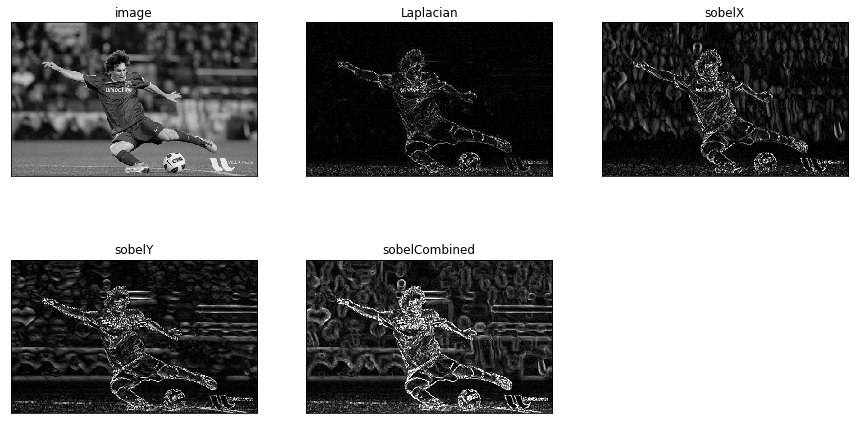

In [9]:

img = cv2.imread("C:/Users/piyus/All programming files/Computer_Vision/data/messi5.jpg", cv2.IMREAD_GRAYSCALE)

# CV_64F --> using 64 bit float data type due to the negative slope induced by the image from white to black and then we
# take the abs. of our laplacian image transformation and we are going to convert this value to back to 8 bit unsigned int

lap = cv2.Laplacian(img, cv2.CV_64F, ksize=1)
lap = np.uint8(np.absolute(lap))

sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)           # dx=1, dy=0
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)           # dx=0, dy=1

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]

plt.figure(figsize = (15,8))
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

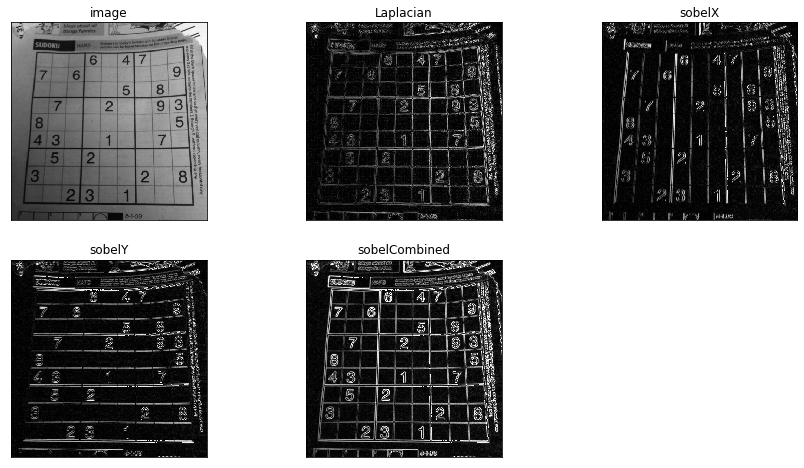

In [8]:

img = cv2.imread("C:/Users/piyus/All programming files/Computer_Vision/data/sudoku.png", cv2.IMREAD_GRAYSCALE)

lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)  
# CV_64F --> using 64 bit float data type due to the negative slope induced by the image from white to black and then we
# take the abs. of our laplacian image transformation and we are going to convert this value to back to 8 bit unsigned int

lap = np.uint8(np.absolute(lap))

sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)           # dx=1, dy=0
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)           # dx=0, dy=1

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined']
images = [img, lap, sobelX, sobelY, sobelCombined]

plt.figure(figsize = (15,8))
for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Note: More vertical line in fig. 3 bcz SobelY is good for change in the vertical direction, so you can see more change in intensity in the vertical direction.